<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [13]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [17]:
## Write your code here
print('Column and data type of dataset:\n',df.dtypes)
print('Summary of dataset:\n',df.info())


Column and data type of dataset:
 ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
Summary of dataset:
 None


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [19]:
## Write your code here
print('Missing values in dataset:\n',df.isnull().sum())



Missing values in dataset:
 ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [21]:
## Write your code here
print("befere immuting , the missing value on Employment, JobSat, and YearsCodePro are:\n", df[['Employment','JobSat','YearsCodePro']].isnull().sum())
df['JobSat'].fillna(df['JobSat'].median(),inplace=True)
df['Employment'].fillna(df['Employment'].value_counts().idxmax(), inplace=True)
df['YearsCodePro'].fillna(df['YearsCodePro'].value_counts().idxmax(), inplace=True)
print("after immuting, the missing value on Employment, JobSat, and YearsCodePro are:\n", df[['Employment','JobSat','YearsCodePro']].isnull().sum())

befere immuting , the missing value on Employment, JobSat, and YearsCodePro are:
 Employment          0
JobSat          36311
YearsCodePro    13827
dtype: int64
after immuting, the missing value on Employment, JobSat, and YearsCodePro are:
 Employment      0
JobSat          0
YearsCodePro    0
dtype: int64


C:\Users\pangr\AppData\Local\Temp\ipykernel_40968\2467869550.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].fillna(df['JobSat'].median(),inplace=True)
C:\Users\pangr\AppData\Local\Temp\ipykernel_40968\2467869550.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


Text(0.5, 1.0, 'Distribution of Job Satisfaction')

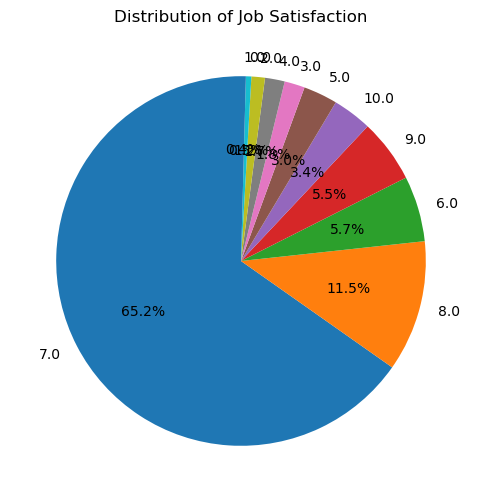

In [23]:
## Write your code here
plt.figure(figsize=(8, 6))
plt.pie(df['JobSat'].value_counts(), labels=df['JobSat'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Job Satisfaction')

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


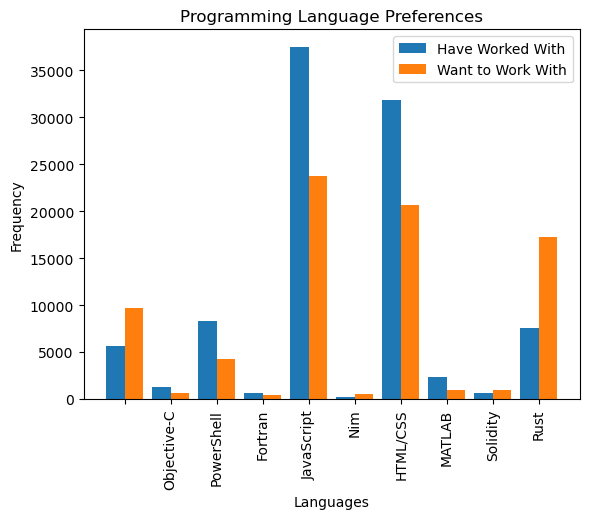

In [25]:
## Write your code here


# Step 1: Split the 'LanguageHaveWorkedWith' column based on the semicolon ';' and expand into separate columns
df["LanguageHaveWorkedWith"] = df["LanguageHaveWorkedWith"].fillna("")
expanded = df["LanguageHaveWorkedWith"].str.split(";", expand=True)

# Step 2: Rename the new columns appropriately
expanded.columns = [f"LanguageHaveWorkedWith_{i+1}" for i in range(expanded.shape[1])]

# Step 3: Concatenate the expanded columns to the original DataFrame
df = pd.concat([df, expanded], axis=1)

# Step 4: Split the 'LanguageWantToWorkWith' column based on the semicolon ';' and expand into separate columns
df["LanguageWantToWorkWith"] = df["LanguageWantToWorkWith"].fillna("")
expanded = df["LanguageWantToWorkWith"].str.split(";", expand=True)

# Step 5: Rename the new columns appropriately
expanded.columns = [f"LanguageWantToWorkWith_{i+1}" for i in range(expanded.shape[1])]

# Step 6: Concatenate the expanded columns to the original DataFrame
df = pd.concat([df, expanded], axis=1)

# Step 7: Combine all language columns for 'Have Worked With'
have_worked_with_languages = []
for col in df.columns:
    if col.startswith("LanguageHaveWorkedWith_"):
        have_worked_with_languages.extend(df[col].dropna().tolist())

# Step 8: Combine all language columns for 'Want to Work With'
want_to_work_with_languages = []
for col in df.columns:
    if col.startswith("LanguageWantToWorkWith_"):
        want_to_work_with_languages.extend(df[col].dropna().tolist())

# Step 9: Count language frequencies
have_worked_with_counts = Counter(have_worked_with_languages)
want_to_work_with_counts = Counter(want_to_work_with_languages)

# Step 10:  Find common and unique languages
common_languages = set(have_worked_with_counts.keys()) & set(want_to_work_with_counts.keys())
unique_have_worked_with = set(have_worked_with_counts.keys()) - common_languages
unique_want_to_work_with = set(want_to_work_with_counts.keys()) - common_languages

# Step 11: Plotting (example with grouped bar chart)
languages_to_plot = list(common_languages)[:10]  # Limit to top 10 for visualization

have_worked_counts_plot = [have_worked_with_counts[lang] for lang in languages_to_plot]
want_to_work_counts_plot = [want_to_work_with_counts[lang] for lang in languages_to_plot]

X_axis = languages_to_plot
  
X_axis = np.arange(len(languages_to_plot))

  
plt.bar(X_axis - 0.2, have_worked_counts_plot, 0.4, label = 'Have Worked With')
plt.bar(X_axis + 0.2, want_to_work_counts_plot, 0.4, label = 'Want to Work With')
  
plt.xticks(X_axis, languages_to_plot, rotation=90)
plt.xlabel("Languages")
plt.ylabel("Frequency")
plt.title("Programming Language Preferences")
plt.legend()
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


Country              RemoteWork                          
Afghanistan          Hybrid (some remote, some in-person)     17
                     In-person                                13
                     Remote                                   10
Albania              Hybrid (some remote, some in-person)     14
                     In-person                                10
                     Remote                                   14
Algeria              Hybrid (some remote, some in-person)     19
                     In-person                                 8
                     Remote                                   22
Andorra              Hybrid (some remote, some in-person)      1
                     In-person                                 5
                     Remote                                    4
Angola               Hybrid (some remote, some in-person)      4
                     In-person                                 6
                     Remote     

<Axes: xlabel='RemoteWork', ylabel='Country'>

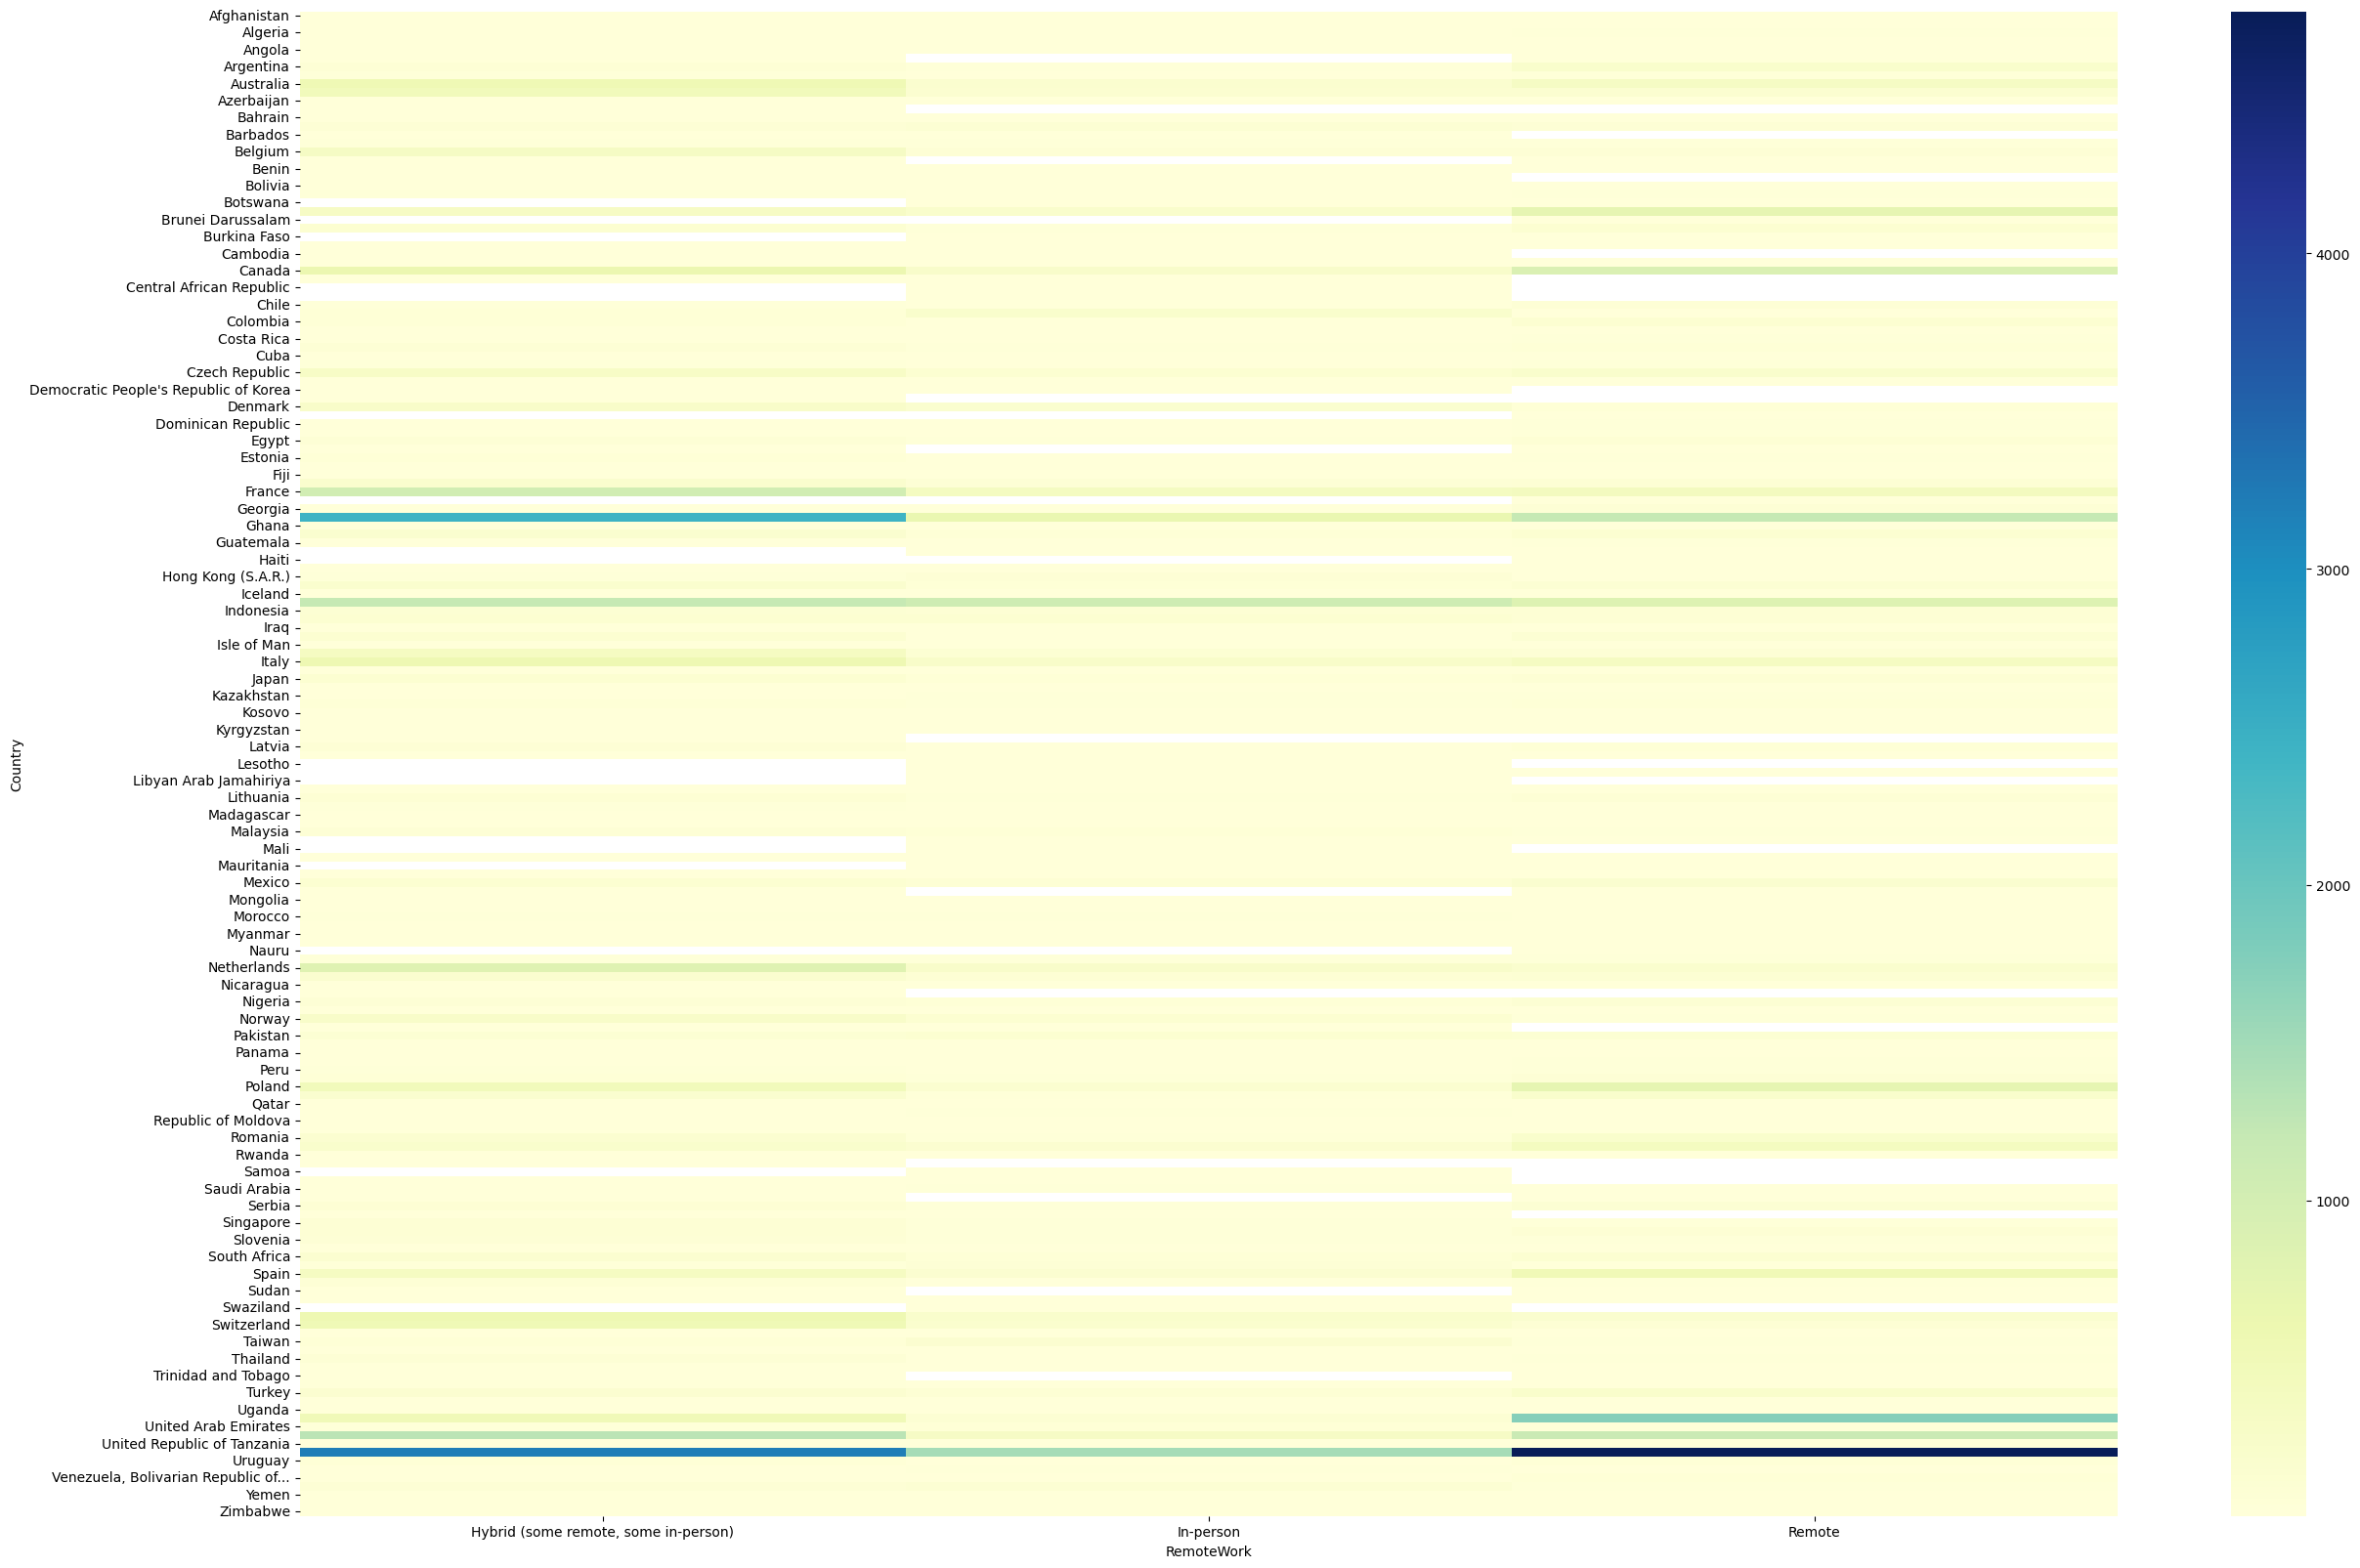

In [31]:
## Write your code here
remoteWork_ctry_df=df.groupby(['Country','RemoteWork'])['RemoteWork'].count()
print(remoteWork_ctry_df.head(20)) 
plt.figure(figsize=(30, 20))
sns.heatmap(remoteWork_ctry_df.unstack(), cmap='YlGnBu', fmt='g')


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [29]:
## Write your code here
df['YearsCodePro'].fillna(0, inplace=True)
df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', 0.5)
df['YearsCodePro'] = df['YearsCodePro'].replace('More than 50 years', 51)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df2=df[['YearsCodePro','JobSat']]
print('Pearson method:\n',df2.corr(method='pearson'))
print('Spearman method:\n',df2.corr(method='spearman'))

Pearson method:
               YearsCodePro    JobSat
YearsCodePro      1.000000  0.065835
JobSat            0.065835  1.000000
Spearman method:
               YearsCodePro    JobSat
YearsCodePro      1.000000  0.104829
JobSat            0.104829  1.000000


C:\Users\pangr\AppData\Local\Temp\ipykernel_40968\329861902.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro'].fillna(0, inplace=True)


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment_1                                                                              
Employed, full-time                                                                1260   
Employed, part-time                                                                  39   
I prefer not to say                                                                   9   
Independent contractor, freelancer, or self-emp...                                  166   
Not employed, and not looking for work                                               10   
Not employed, but looking for work                                                  100   
Retired                                                                              18   
Student, full-time                                                                  155   
Student, part-time                                                                   36   

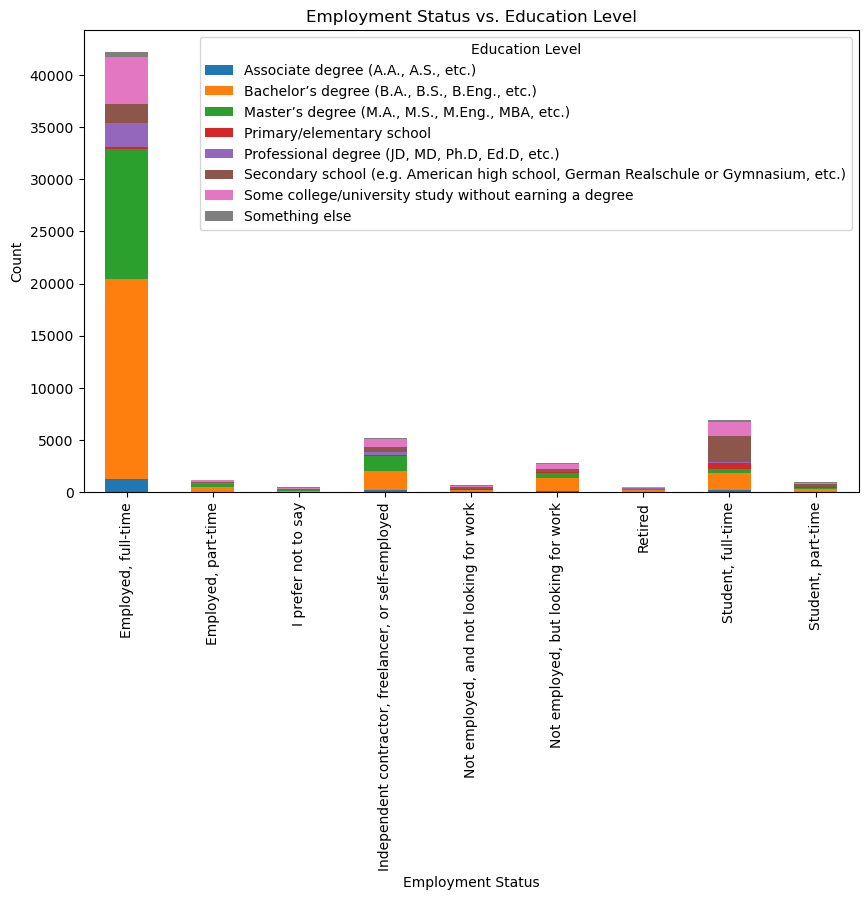

In [33]:
## Write your code here
# Step 1: Split the 'Employment' column based on the semicolon ';' and expand into separate columns
expanded = df["Employment"].str.split(";", expand=True)

# Step 2: Rename the new columns appropriately
expanded.columns = [f"Employment_{i+1}" for i in range(expanded.shape[1])]

# Step 3: Concatenate the expanded columns to the original DataFrame
df = pd.concat([df, expanded], axis=1)
cross_tab = pd.crosstab(df['Employment_1'], df['EdLevel'])
print(cross_tab)
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Employment Status vs. Education Level')
plt.legend(title='Education Level')
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [35]:
## Write your code here
df.to_csv('cleaned_survey_data.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
